In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from datetime import datetime
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, log_loss

import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
complete_unscaled_df = pd.read_csv('raw_data/complete_data_unscaled.csv')

complete_unscaled_df = pd.get_dummies(data = complete_unscaled_df, columns = ['town', 'flat_type', 'flat_model'], drop_first = True)

complete_unscaled_df['test_data'] = complete_unscaled_df.apply(lambda x: True if x['month_count'] >= 221 else False, axis = 1)

complete_unscaled_df.head()

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,test_data
0,0,93.0,8,85,0.336,0.506,0.582,0.847,4.489,10.024,...,1,0,0,0,0,0,0,0,0,False
1,0,66.0,5,71,0.297,0.340,0.528,0.272,0.579,6.096,...,0,0,0,0,0,1,0,0,0,False
2,0,52.0,5,73,0.154,0.074,0.338,0.182,0.376,6.023,...,0,0,0,0,0,1,0,0,0,False
3,0,56.0,2,73,0.170,0.214,0.402,0.159,0.450,6.091,...,0,0,0,0,0,1,0,0,0,False
4,0,82.0,14,77,0.108,0.759,0.105,0.207,0.295,7.540,...,0,0,0,0,0,0,0,0,0,False


In [15]:
complete_unscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616778 entries, 0 to 616777
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   month_count                        616778 non-null  int64  
 1   floor_area_sqm                     616778 non-null  float64
 2   storey                             616778 non-null  int64  
 3   remaining_lease                    616778 non-null  int64  
 4   dist_phpcs                         616778 non-null  float64
 5   dist_schools                       616778 non-null  float64
 6   dist_supermarkets                  616778 non-null  float64
 7   dist_hawkercentres                 616778 non-null  float64
 8   dist_mrtlrt                        616778 non-null  float64
 9   dist_city                          616778 non-null  float64
 10  int_rate                           616778 non-null  float64
 11  resale_price                       6167

In [16]:
train_test_split_bool = complete_unscaled_df.iloc[:, 63]

complete_unscaled_df = complete_unscaled_df.drop('test_data', axis = 1)

# train_test_split_bool = np.random.choice([True, False], complete_unscaled_df.shape[0], replace = True, p = [0.8, 0.2])
             
x_split = complete_unscaled_df.drop('resale_price', axis = 1)

y_split = complete_unscaled_df.iloc[:, 11]

y_split_monthly = complete_unscaled_df.iloc[:, [0, 11]]

x_train = x_split[~train_test_split_bool]

y_train = y_split[~train_test_split_bool]

x_test = x_split[train_test_split_bool]

y_test = y_split[train_test_split_bool]

y_test_monthly = y_split_monthly[train_test_split_bool]

table_index = {0: 'R2', 1: 'MSE', 2: 'Model Complexity', 3: 'Regularized Cost'}

for i in range(4, len(x_train.columns) + 4):
    
    table_index[i] = f'Coefficient {i - 4}: {x_train.columns[i - 4]}'

y_test

491724    340288.0
491725    334168.0
491726    335000.0
491727    755000.0
491728    349000.0
            ...   
616773    340000.0
616774    400000.0
616775    370000.0
616776    380000.0
616777    765000.0
Name: resale_price, Length: 125054, dtype: float64

In [5]:
linear_simple = linear_model.LinearRegression()

linear_simple.fit(x_train, y_train)

train_y_predict = linear_simple.predict(x_train)

test_y_predict = linear_simple.predict(x_test)

train_mse = mean_squared_error(y_train, train_y_predict)

train_r2 = linear_simple.score(x_train, y_train)

test_mse = mean_squared_error(y_test, test_y_predict)

test_r2 = linear_simple.score(x_test, y_test)
 
print('MSE on train set:', train_mse)
print('R2 on train set:', train_r2)

print('MSE on test set:', test_mse)
print('R2 on test set:', test_r2)

print('\n')

for i, coef in enumerate(linear_simple.coef_):
    
    print(f'{table_index[i + 4]}: {coef}')

MSE on train set: 2967532407.547946
R2 on train set: 0.8419535307899059
MSE on test set: 8058996039.2528515
R2 on test set: 0.7130073788394475


Coefficient 0: month_count: 1247.3958965855509
Coefficient 1: floor_area_sqm: 1813.1298918957773
Coefficient 2: storey: 2992.2358027877935
Coefficient 3: remaining_lease: 3000.2297774754943
Coefficient 4: dist_phpcs: -12640.880494485684
Coefficient 5: dist_schools: 15528.227487645598
Coefficient 6: dist_supermarkets: -5622.788788724252
Coefficient 7: dist_hawkercentres: -6477.7453696560315
Coefficient 8: dist_mrtlrt: -9221.914356302128
Coefficient 9: dist_city: -3759.8261180321388
Coefficient 10: int_rate: -22636.801125601738
Coefficient 11: town_bedok: -11082.701792704154
Coefficient 12: town_bishan: 34412.5073145976
Coefficient 13: town_bukit_batok: -28998.756040685887
Coefficient 14: town_bukit_merah: 34844.76215063941
Coefficient 15: town_bukit_panjang: -84136.28170281179
Coefficient 16: town_bukit_timah: 92165.06257793338
Coefficient 17: 

In [48]:
test_months = x_test['month_count'].unique()

test_x_months = []

test_y_months = []

for i in range(len(test_months)):
    
#     print(test_months[i])
    
    exec(f'test_x_{i+1} = x_test[x_test["month_count"] == test_months[i]]')
    
    exec(f'test_y_{i+1} = y_test_monthly[y_test_monthly["month_count"] == test_months[i]].iloc[: , -1]')
    
    exec(f'test_x_months.append(test_x_{i+1})')
    
    exec(f'test_y_months.append(test_y_{i+1})')

# for i in range(len(test_x_months)):
    
#     print(len(test_y_months[0]) == len(test_x_months[0]))


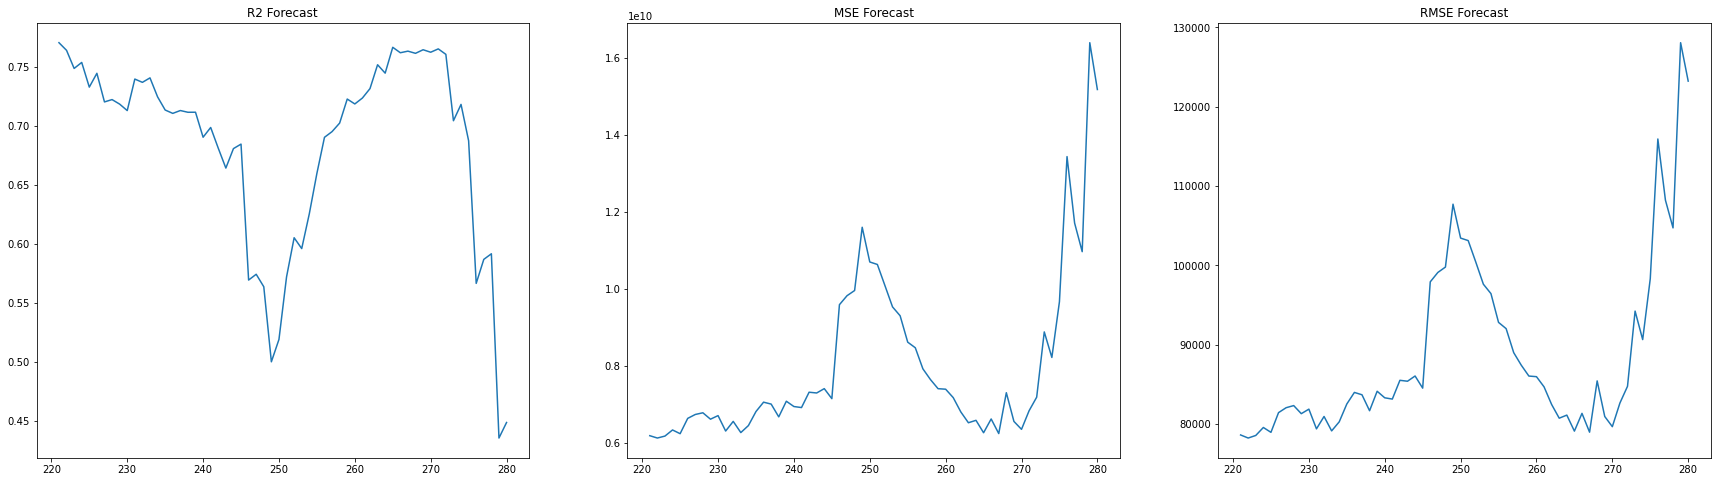

In [66]:
monthly_test_r2 = []

monthly_test_mse = []

for i in range(len(test_months)):
    
    test_y_predict = linear_simple.predict(test_x_months[i])
    
    test_mse = mean_squared_error(test_y_months[i], test_y_predict)

    test_r2 = linear_simple.score(test_x_months[i], test_y_months[i])
    
    monthly_test_r2.append(test_r2)
    
    monthly_test_mse.append(test_mse)
    
    exec('monthly_test_rmse = [np.sqrt(i) for i in monthly_test_mse]')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 8))
ax1.plot(test_months, monthly_test_r2)
ax2.plot(test_months, monthly_test_mse)
ax3.plot(test_months, monthly_test_rmse)
ax1.set_title('R2 Forecast')
ax2.set_title('MSE Forecast')
ax3.set_title('RMSE Forecast')
ax1.xlabel = ax2.xlabel = ax3.xlabel = 'Month Count'
ax1.ylabel = 'R2 (SLR)'
ax2.ylabel = 'MSE (SLR)'
ax3.ylabel = 'RMSE (SLR)'


In [6]:
alpha = [0.01, 0.1, 1, 10, 100, 1000]
    
linear_lasso = [linear_model.Lasso(alpha = alpha[i], tol = 1e-01, max_iter = 10000) for i in range(len(alpha))]
linear_ridge = [linear_model.Ridge(alpha = alpha[i], tol = 1e-01, max_iter = 10000) for i in range(len(alpha))]

complete_unscaled_df = pd.read_csv('raw_data/complete_data_unscaled.csv')

complete_unscaled_df = pd.get_dummies(data = complete_unscaled_df, columns = ['town', 'flat_type', 'flat_model'], drop_first = False)

# drop_cols = ['town', 'flat_type', 'flat_model']

# complete_unscaled_df = complete_unscaled_df.drop(drop_cols, axis = 1)

complete_unscaled_df['test_data'] = complete_unscaled_df.apply(lambda x: True if x['month_count'] >= 221 else False, axis = 1)

complete_unscaled_df.head()

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,test_data
0,0,93.0,8,85,0.336,0.506,0.582,0.847,4.489,10.024,...,1,0,0,0,0,0,0,0,0,False
1,0,66.0,5,71,0.297,0.340,0.528,0.272,0.579,6.096,...,0,0,0,0,0,1,0,0,0,False
2,0,52.0,5,73,0.154,0.074,0.338,0.182,0.376,6.023,...,0,0,0,0,0,1,0,0,0,False
3,0,56.0,2,73,0.170,0.214,0.402,0.159,0.450,6.091,...,0,0,0,0,0,1,0,0,0,False
4,0,82.0,14,77,0.108,0.759,0.105,0.207,0.295,7.540,...,0,0,0,0,0,0,0,0,0,False


In [7]:
train_test_split_bool = complete_unscaled_df.iloc[:, 66]

complete_unscaled_df = complete_unscaled_df.drop('test_data', axis = 1)

# train_test_split_bool = np.random.choice([True, False], complete_unscaled_df.shape[0], replace = True, p = [0.8, 0.2])
             
x_split = complete_unscaled_df.drop('resale_price', axis = 1)

y_split = complete_unscaled_df.iloc[:, 11]

x_train = x_split[~train_test_split_bool]

y_train = y_split[~train_test_split_bool]

x_test = x_split[train_test_split_bool]

y_test = y_split[train_test_split_bool]

table_index = {0: 'R2', 1: 'MSE', 2: 'Model Complexity', 3: 'Regularized Cost'}

for i in range(4, len(x_train.columns) + 4):
    
    table_index[i] = f'Coefficient {i - 4}: {x_train.columns[i - 4]}'

y_test

491724    340288.0
491725    334168.0
491726    335000.0
491727    755000.0
491728    349000.0
            ...   
616773    340000.0
616774    400000.0
616775    370000.0
616776    380000.0
616777    765000.0
Name: resale_price, Length: 125054, dtype: float64

In [8]:
lasso_model_outputs = []

lasso_model_coefs = []

for i in range(len(alpha)):
    
    linear_lasso[i].fit(x_train, y_train)
    
    y_predict = linear_lasso[i].predict(x_test)
    
    mse = mean_squared_error(y_test, y_predict)
    
    r2 = linear_lasso[i].score(x_test, y_test)
    
    cplxy = sum([abs(j) for j in linear_lasso[i].coef_])
    
    lasso_model_performance_attributes = [r2, mse, cplxy,  mse + alpha[i] * cplxy]
    
    lasso_model_coefs.append(linear_lasso[i].coef_)
    
    [lasso_model_performance_attributes.append(i) for i in linear_lasso[i].coef_]
    
    lasso_model_outputs.append(lasso_model_performance_attributes)
    
    print('Trained')

lasso_model_outputs_t = np.transpose(lasso_model_outputs)

lasso_model_table = pd.DataFrame(lasso_model_outputs_t, columns = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000'])
    
lasso_model_table = lasso_model_table.rename(index = table_index)

print(lasso_model_table.to_string())

Trained
Trained
Trained
Trained
Trained
Trained
                                                   alpha = 0.01   alpha = 0.1     alpha = 1    alpha = 10   alpha = 100  alpha = 1000
R2                                                 6.835844e-01  6.835319e-01  6.828134e-01  6.817881e-01  6.959896e-01  6.456468e-01
MSE                                                8.885219e+09  8.886693e+09  8.906868e+09  8.935660e+09  8.536869e+09  9.950539e+09
Model Complexity                                   2.183720e+06  2.169598e+06  2.039268e+06  1.734477e+06  6.986890e+05  8.040614e+04
Regularized Cost                                   8.885241e+09  8.886910e+09  8.908908e+09  8.953005e+09  8.606738e+09  1.003095e+10
Coefficient 0: month_count                         1.130154e+03  1.130165e+03  1.130271e+03  1.131108e+03  1.170425e+03  1.187008e+03
Coefficient 1: floor_area_sqm                      3.128927e+03  3.128952e+03  3.129309e+03  3.132416e+03  3.079966e+03  3.382235e+03
Coefficient 2:

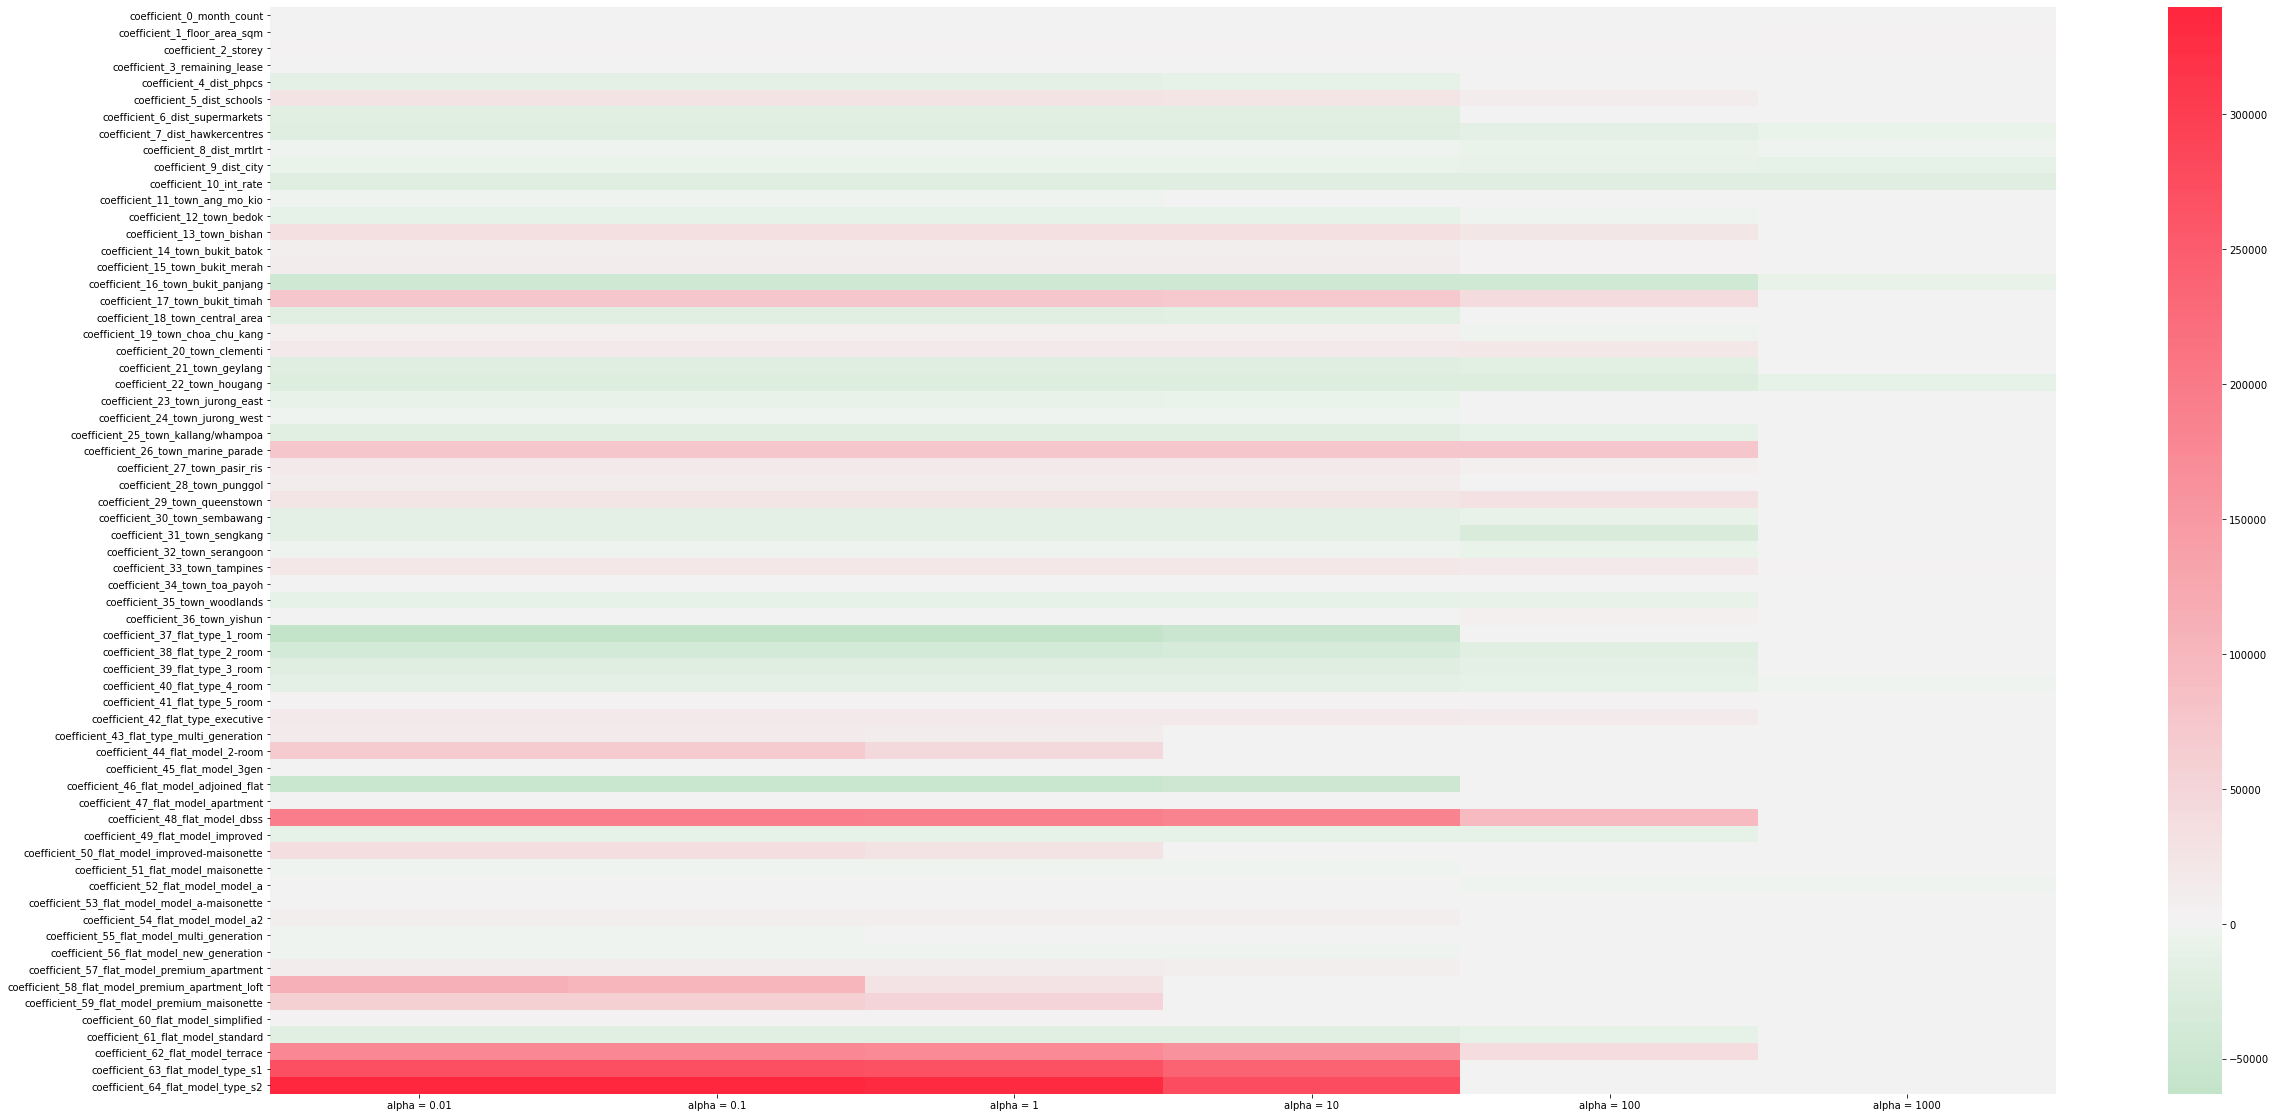

In [9]:
alpha_cols = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000']

lasso_coef_df = pd.DataFrame.from_dict(dict(zip(alpha_cols, lasso_model_coefs)))

lasso_coef_df = lasso_coef_df.set_index(pd.Series([f'coefficient_{i - 4}_{x_train.columns[i - 4]}' for i in range(4, len(x_train.columns) + 4)]))

fig, ax = plt.subplots(figsize = (40, 20))

rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

ax = sns.heatmap(lasso_coef_df, cmap=rdgn, center=0.00)


In [10]:
ridge_model_outputs = []

ridge_model_coefs = []

for i in range(len(alpha)):
    
    linear_ridge[i].fit(x_train, y_train)
    
    y_predict = linear_ridge[i].predict(x_test)
    
    mse = mean_squared_error(y_test, y_predict)
    
    r2 = linear_ridge[i].score(x_test, y_test)
    
    cplxy = sum([j ** 2 for j in linear_ridge[i].coef_]) 
    
    ridge_model_performance_attributes = [r2, mse, cplxy,  mse + alpha[i] * cplxy]
    
    ridge_model_coefs.append(linear_ridge[i].coef_)
    
    [ridge_model_performance_attributes.append(i) for i in linear_ridge[i].coef_]
    
    ridge_model_outputs.append(ridge_model_performance_attributes)
    
    print('Trained')

ridge_model_outputs_t = np.transpose(ridge_model_outputs)

ridge_model_table = pd.DataFrame(ridge_model_outputs_t, columns = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000'])

ridge_model_table = ridge_model_table.rename(index = table_index)

print(ridge_model_table.to_string())

Trained
Trained
Trained
Trained
Trained
Trained
                                                   alpha = 0.01   alpha = 0.1     alpha = 1    alpha = 10   alpha = 100  alpha = 1000
R2                                                 7.130115e-01  7.130050e-01  7.129424e-01  7.124908e-01  7.099946e-01  6.975541e-01
MSE                                                8.058880e+09  8.059062e+09  8.060822e+09  8.073501e+09  8.143597e+09  8.492938e+09
Model Complexity                                   2.656553e+11  2.652242e+11  2.613885e+11  2.388568e+11  1.500807e+11  3.558277e+10
Regularized Cost                                   1.071543e+10  3.458149e+10  2.694494e+11  2.396641e+12  1.501622e+13  3.559126e+13
Coefficient 0: month_count                         1.247397e+03  1.247409e+03  1.247527e+03  1.248608e+03  1.256147e+03  1.275790e+03
Coefficient 1: floor_area_sqm                      1.813149e+03  1.813319e+03  1.814998e+03  1.830784e+03  1.962850e+03  2.464600e+03
Coefficient 2:

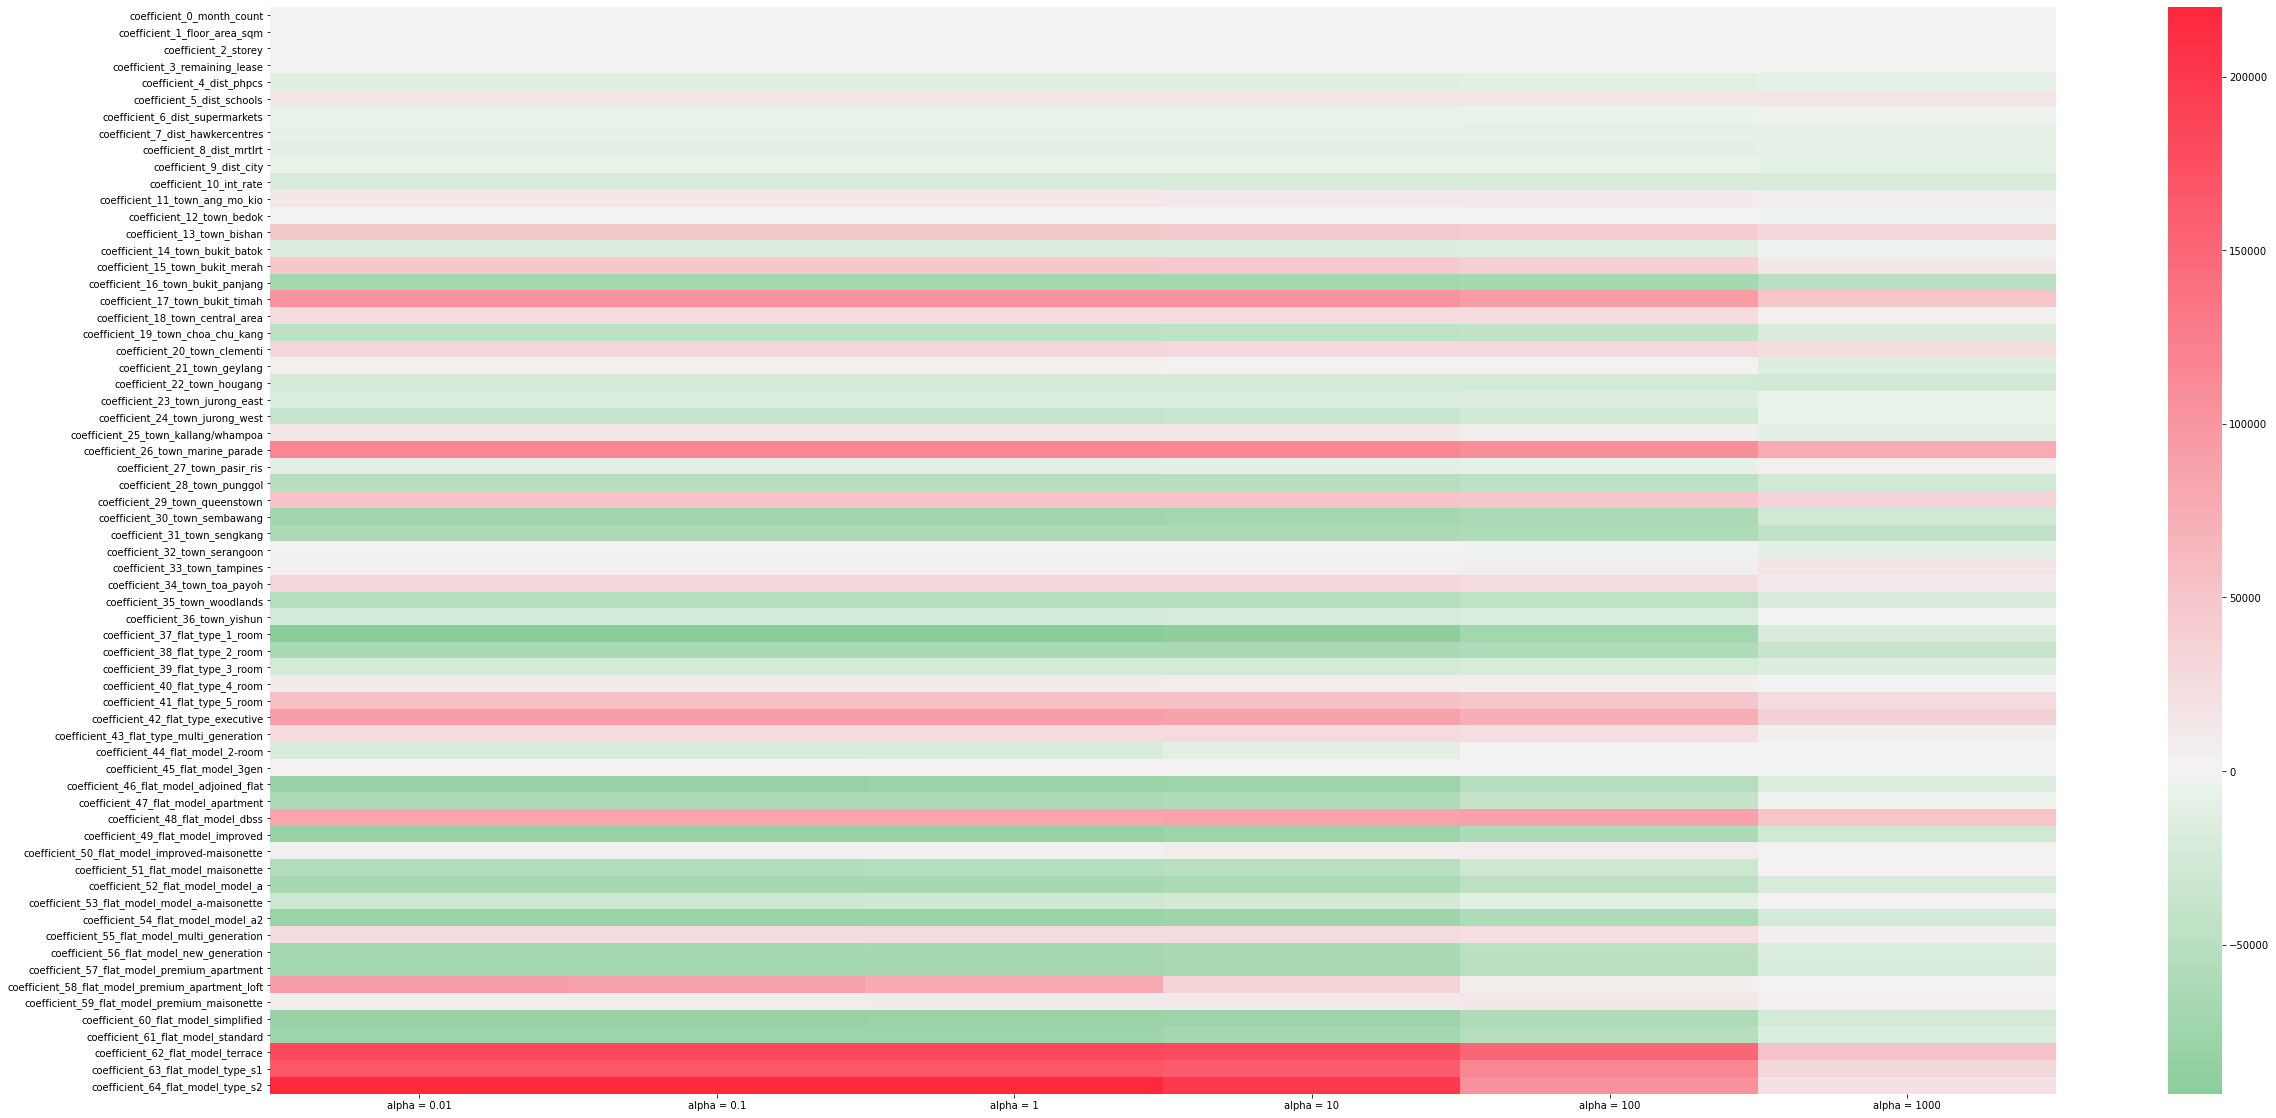

In [11]:
alpha_cols = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000']

ridge_coef_df = pd.DataFrame.from_dict(dict(zip(alpha_cols, ridge_model_coefs)))

ridge_coef_df = ridge_coef_df.set_index(pd.Series([f'coefficient_{i - 4}_{x_train.columns[i - 4]}' for i in range(4, len(x_train.columns) + 4)]))

fig, ax = plt.subplots(figsize = (40, 20))

rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

ax = sns.heatmap(ridge_coef_df, cmap=rdgn, center=0.00)
